# US education data

US education enrollment, finances, and scores on math and reading tests

Data from Kaggle https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home

This data is from the US Census Bureau and the National Center for Education Statistics 

The dataset includes enrollment, finances, and achievement scores for US states and some territories from 1992 to 2017. I am interestd in looking at this data because it may answer the following questions:

Do states with more financial support have better student outcomes in terms of achievement scores?
    
Do schools with more students receive more funding?
    
Do states with more students have better or worse student outcomes?
    
Do student scores get better over time?
    
Which states perform the best? The worst?
    
This dataset does not seem to cover some things like graduation rates, droppout rates. Maybe that can be determined from population and enrollment comparisons. Or things like factors that influence enrollment or the test scores.

Future research questions to ask:
    
Can this information be used to predict future scores?
    
What kind of visualizations are available to map out achievement scores across the country?

First question to address:

Which states have the best and worst performance?

To answer this, we need to define best and worst performance. To start let's pull up metrics from 2015 and look at the test results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('states_all.csv')
df_2015 = df[df['YEAR'] == 2015]
df_2015.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1178,2015_ALABAMA,ALABAMA,2015,734974.0,7360222.0,795238.0,4080167.0,2484817.0,7501799.0,3817479.0,...,55808.0,55792.0,50668.0,452764.0,222182.0,688176.0,230.977423,266.555319,217.049090,269.020028
1179,2015_ALASKA,ALASKA,2015,130755.0,2920986.0,344111.0,2026555.0,550320.0,2968341.0,1484610.0,...,10118.0,9400.0,9651.0,80011.0,38688.0,122068.0,236.328417,280.493456,212.792600,258.753762
1180,2015_ARIZONA,ARIZONA,2015,944978.0,8230507.0,1093834.0,3232013.0,3904660.0,7902600.0,3846357.0,...,86594.0,84084.0,84854.0,687144.0,333579.0,1029470.0,237.611755,282.919489,215.311336,260.317019
1181,2015_ARKANSAS,ARKANSAS,2015,479682.0,5308625.0,581412.0,4075118.0,652095.0,5350543.0,2620399.0,...,35893.0,36882.0,32385.0,296050.0,142242.0,454375.0,235.215470,275.064756,218.077496,262.769392
1182,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.0,492835.0,3748465.0,1941009.0,NaN,231.549345,275.324573,212.677949,258.768268


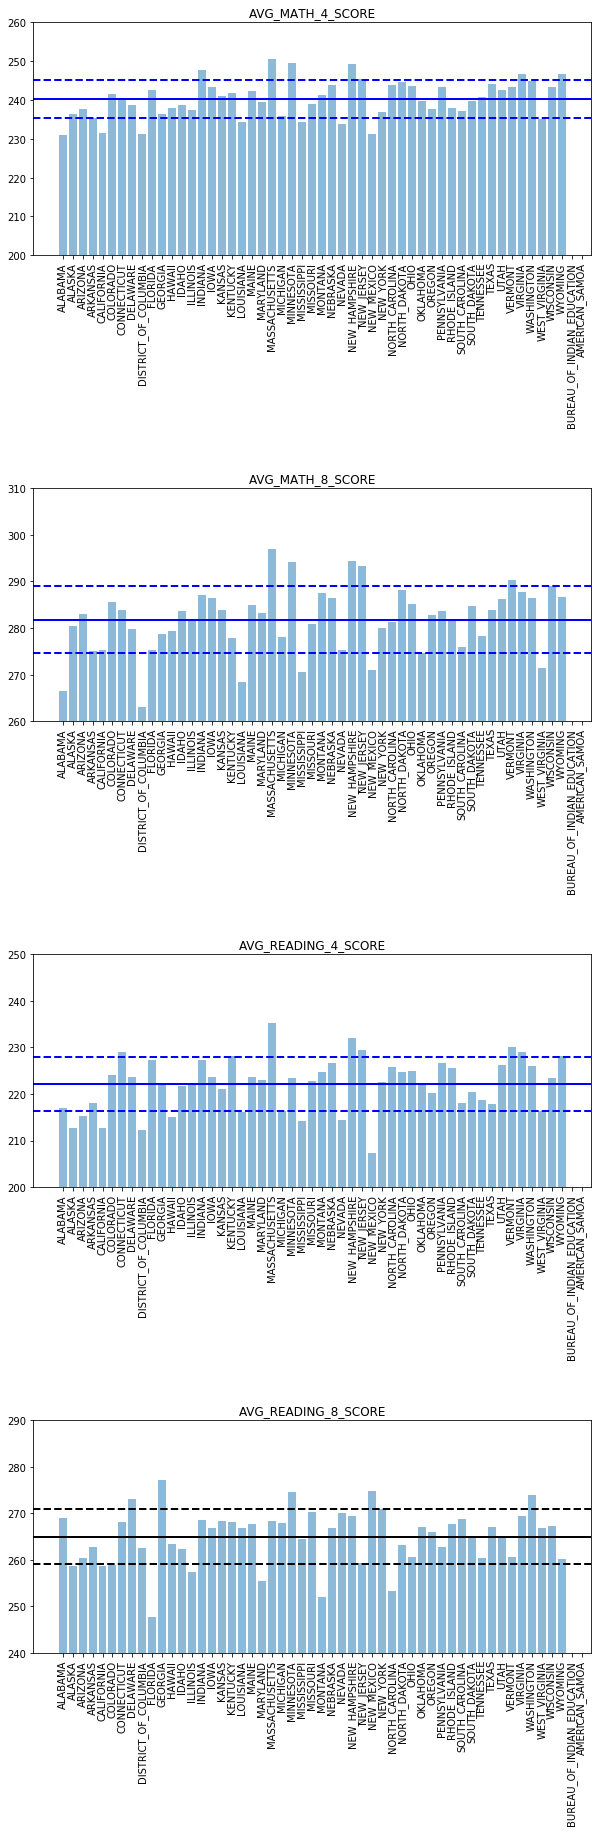

In [44]:
plt.figure(figsize=(10,30))

plt.subplot(4,1,1)
plt.bar(df_2015['STATE'].tolist(), df_2015['AVG_MATH_4_SCORE'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylim(200,260)
plt.title('AVG_MATH_4_SCORE')
plt.axhline(df_2015['AVG_MATH_4_SCORE'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axhline(df_2015['AVG_MATH_4_SCORE'].mean() + df_2015['AVG_MATH_4_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df_2015['AVG_MATH_4_SCORE'].mean() - df_2015['AVG_MATH_4_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Math score')

plt.subplot(4,1,2)
plt.bar(df_2015['STATE'].tolist(), df_2015['AVG_MATH_8_SCORE'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylim(260,310)
plt.title('AVG_MATH_8_SCORE')
plt.axhline(df_2015['AVG_MATH_8_SCORE'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axhline(df_2015['AVG_MATH_8_SCORE'].mean() + df_2015['AVG_MATH_8_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df_2015['AVG_MATH_8_SCORE'].mean() - df_2015['AVG_MATH_8_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Math score')

plt.subplot(4,1,3)
plt.bar(df_2015['STATE'].tolist(), df_2015['AVG_READING_4_SCORE'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylim(200,250)
plt.title('AVG_READING_4_SCORE')
plt.axhline(df_2015['AVG_READING_4_SCORE'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axhline(df_2015['AVG_READING_4_SCORE'].mean() + df_2015['AVG_READING_4_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df_2015['AVG_READING_4_SCORE'].mean() - df_2015['AVG_READING_4_SCORE'].std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Reading score')

plt.subplot(4,1,4)
plt.bar(df_2015['STATE'].tolist(), df_2015['AVG_READING_8_SCORE'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.title('AVG_READING_8_SCORE')
plt.axhline(df_2015['AVG_READING_8_SCORE'].mean(), color='black', linestyle='solid', linewidth=2)
plt.axhline(df_2015['AVG_READING_8_SCORE'].mean() + df_2015['AVG_READING_8_SCORE'].std(), color='black', linestyle='dashed', linewidth=2)
plt.axhline(df_2015['AVG_READING_8_SCORE'].mean() - df_2015['AVG_READING_8_SCORE'].std(), color='black', linestyle='dashed', linewidth=2)
plt.ylim(240,290)
plt.ylabel('Reading score')

plt.subplots_adjust(hspace=1.0)

plt.show()

We can see which states ar performing above the mean plus standard deviation and which are performing below the mean minus the standard deviation. Let's get a list of those states for each of the four tests to see if there is any overlap. And we will add that if you are in the worst category, you cannot also be in the best.

In [16]:
states_best_math_4 = df_2015[df_2015['AVG_MATH_4_SCORE'] > df_2015['AVG_MATH_4_SCORE'].mean() + df_2015['AVG_MATH_4_SCORE'].std()]
states_best_math_8 = df_2015[df_2015['AVG_MATH_8_SCORE'] > df_2015['AVG_MATH_8_SCORE'].mean() + df_2015['AVG_MATH_8_SCORE'].std()]
states_best_reading_4 = df_2015[df_2015['AVG_READING_4_SCORE'] > df_2015['AVG_READING_4_SCORE'].mean() + df_2015['AVG_READING_4_SCORE'].std()]
states_best_reading_8 = df_2015[df_2015['AVG_READING_8_SCORE'] > df_2015['AVG_READING_8_SCORE'].mean() + df_2015['AVG_READING_8_SCORE'].std()]
states_best_reading_8


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1185,2015_DELAWARE,DELAWARE,2015,121845.0,2017075.0,137544.0,1142333.0,737198.0,1975093.0,1072395.0,...,10533.0,10090.0,8782.0,83409.0,39845.0,124807.0,238.678019,279.810244,223.698697,273.048030
1188,2015_GEORGIA,GEORGIA,2015,1717805.0,18584666.0,1831221.0,8310872.0,8442573.0,18501103.0,10081483.0,...,134343.0,131509.0,109345.0,1067899.0,513865.0,1628449.0,236.452519,278.711797,222.013497,277.191363
1201,2015_MINNESOTA,MINNESOTA,2015,807044.0,11684249.0,629909.0,7567199.0,3487141.0,11969872.0,6257807.0,...,65362.0,63075.0,69441.0,519641.0,265709.0,800793.0,249.575847,294.147778,223.352920,274.497568
1209,2015_NEW_MEXICO,NEW_MEXICO,2015,326297.0,3789651.0,499789.0,2595682.0,694180.0,3846641.0,1773801.0,...,25681.0,24957.0,21106.0,205691.0,96798.0,310998.0,231.167236,270.897534,207.240446,274.806746
1225,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1007338.0,244.981422,286.513108,225.892889,273.961831


In [20]:
states_worst_math_4 = df_2015[df_2015['AVG_MATH_4_SCORE'] < df_2015['AVG_MATH_4_SCORE'].mean() - df_2015['AVG_MATH_4_SCORE'].std()]
states_worst_math_8 = df_2015[df_2015['AVG_MATH_8_SCORE'] < df_2015['AVG_MATH_8_SCORE'].mean() - df_2015['AVG_MATH_8_SCORE'].std()]
states_worst_reading_4 = df_2015[df_2015['AVG_READING_4_SCORE'] < df_2015['AVG_READING_4_SCORE'].mean() - df_2015['AVG_READING_4_SCORE'].std()]
states_worst_reading_8 = df_2015[df_2015['AVG_READING_8_SCORE'] < df_2015['AVG_READING_8_SCORE'].mean() - df_2015['AVG_READING_8_SCORE'].std()]
states_worst_reading_8


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1179,2015_ALASKA,ALASKA,2015,130755.0,2920986.0,344111.0,2026555.0,550320.0,2968341.0,1484610.0,...,10118.0,9400.0,9651.0,80011.0,38688.0,122068.0,236.328417,280.493456,212.792600,258.753762
1182,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.0,492835.0,3748465.0,1941009.0,NaN,231.549345,275.324573,212.677949,258.768268
1183,2015_COLORADO,COLORADO,2015,872320.0,9648297.0,715254.0,4354525.0,4578518.0,9557682.0,4578938.0,...,68176.0,65957.0,65317.0,541348.0,260909.0,834481.0,241.563576,285.539189,224.023225,258.986843
1187,2015_FLORIDA,FLORIDA,2015,2743641.0,26971491.0,3118041.0,10661586.0,13191864.0,27277049.0,14931173.0,...,215435.0,206785.0,192877.0,1692825.0,839773.0,2592720.0,242.664321,275.323818,227.188969,247.653445
1191,2015_ILLINOIS,ILLINOIS,2015,2047123.0,32096832.0,2262192.0,11858968.0,17975672.0,32410033.0,17313173.0,...,149373.0,150193.0,147993.0,1198970.0,619292.0,1905851.0,237.307814,281.968567,222.022268,257.350440
1198,2015_MARYLAND,MARYLAND,2015,874108.0,14491642.0,819162.0,6267624.0,7404856.0,13882823.0,7686024.0,...,66910.0,63777.0,58493.0,530541.0,253096.0,814671.0,239.499751,283.149034,222.944190,255.469418
1204,2015_MONTANA,MONTANA,2015,144447.0,1804339.0,214980.0,851068.0,738291.0,1804841.0,940488.0,...,11659.0,10967.0,9756.0,90837.0,41822.0,133817.0,241.287048,287.464006,224.757394,251.976165
1211,2015_NORTH_CAROLINA,NORTH_CAROLINA,2015,1465031.0,13146934.0,1589570.0,8172685.0,3384679.0,14060699.0,7960222.0,...,118617.0,117902.0,99258.0,945647.0,462874.0,1427086.0,243.742267,281.331091,225.810591,253.227768


In [33]:
list_best_states = states_best_math_4['STATE'].tolist() + states_best_math_8['STATE'].tolist() + states_best_reading_4['STATE'].tolist() + states_best_reading_8['STATE'].tolist() 
list_best_states.sort()
list_best_states
#list_best_states_unique = []
#for state in list_best_states:
#    if state not in list_best_states_unique:
#        list_best_states_unique.append(state)
#list_best_states_unique.sort()        
#list_best_states_unique


['CONNECTICUT',
 'DELAWARE',
 'GEORGIA',
 'INDIANA',
 'KENTUCKY',
 'MASSACHUSETTS',
 'MASSACHUSETTS',
 'MASSACHUSETTS',
 'MINNESOTA',
 'MINNESOTA',
 'MINNESOTA',
 'NEW_HAMPSHIRE',
 'NEW_HAMPSHIRE',
 'NEW_HAMPSHIRE',
 'NEW_JERSEY',
 'NEW_JERSEY',
 'NEW_JERSEY',
 'NEW_MEXICO',
 'VERMONT',
 'VERMONT',
 'VIRGINIA',
 'VIRGINIA',
 'WASHINGTON',
 'WISCONSIN',
 'WYOMING',
 'WYOMING']

In [34]:
list_worst_states = states_worst_math_4['STATE'].tolist() + states_worst_math_8['STATE'].tolist() + states_worst_reading_4['STATE'].tolist() + states_worst_reading_8['STATE'].tolist() 
list_worst_states.sort()
list_worst_states
#list_worst_states_unique = []
#for state in list_worst_states:
#    if state not in list_worst_states_unique:
#        list_worst_states_unique.append(state)
#list_worst_states_unique.sort()        
#list_worst_states_unique


['ALABAMA',
 'ALABAMA',
 'ALASKA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'CALIFORNIA',
 'CALIFORNIA',
 'COLORADO',
 'DISTRICT_OF_COLUMBIA',
 'DISTRICT_OF_COLUMBIA',
 'DISTRICT_OF_COLUMBIA',
 'FLORIDA',
 'HAWAII',
 'ILLINOIS',
 'LOUISIANA',
 'LOUISIANA',
 'LOUISIANA',
 'MARYLAND',
 'MICHIGAN',
 'MISSISSIPPI',
 'MISSISSIPPI',
 'MISSISSIPPI',
 'MONTANA',
 'NEVADA',
 'NEVADA',
 'NEW_MEXICO',
 'NEW_MEXICO',
 'NEW_MEXICO',
 'NORTH_CAROLINA',
 'OKLAHOMA',
 'WEST_VIRGINIA',
 'WEST_VIRGINIA',
 'WEST_VIRGINIA']

States with multiple appearances in the best and worst lists of states based on performance in math and reading are: MASSACHUSETTS, MINNESOTA, NEW_HAMPSHIRE, NEW_JERSEY and CALIFORNIA, DISTRICT_OF_COLUMBIA, LOUISIANA, MISSISSIPPI, NEW_MEXICO, WEST_VIRGINIA, respectively. They each have 3 appearances.

In [42]:
#count_state = 0
for state in list_worst_states:
    if (list_worst_states.count(state)) > 2:
        print(state)

CALIFORNIA
CALIFORNIA
CALIFORNIA
DISTRICT_OF_COLUMBIA
DISTRICT_OF_COLUMBIA
DISTRICT_OF_COLUMBIA
LOUISIANA
LOUISIANA
LOUISIANA
MISSISSIPPI
MISSISSIPPI
MISSISSIPPI
NEW_MEXICO
NEW_MEXICO
NEW_MEXICO
WEST_VIRGINIA
WEST_VIRGINIA
WEST_VIRGINIA


In [55]:
top_best_states = []
for state in list_best_states:
    if (list_best_states.count(state)) > 2:
        top_best_states.append(state)
print(top_best_states)

['MASSACHUSETTS', 'MASSACHUSETTS', 'MASSACHUSETTS', 'MINNESOTA', 'MINNESOTA', 'MINNESOTA', 'NEW_HAMPSHIRE', 'NEW_HAMPSHIRE', 'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_JERSEY', 'NEW_JERSEY']


Next question to ask is do the best and worst performing states receive the more or less funding compared to other states? To answer this we are going to look at total expenditure per enrolled student in 2015 for each state and see how these values compare to the average dollare per student amount.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


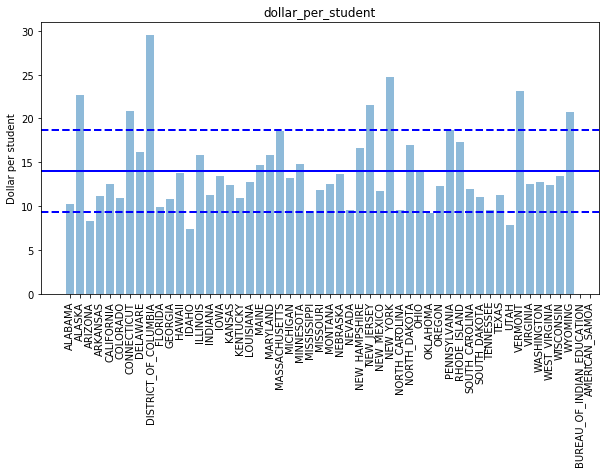

In [47]:
df_2015['dollar_per_student'] = df_2015['TOTAL_EXPENDITURE']/df_2015['ENROLL']

plt.figure(figsize=(10,5))

plt.bar(df_2015['STATE'].tolist(), df_2015['dollar_per_student'], alpha=0.5)
plt.xticks(rotation='vertical')
plt.title('dollar_per_student')
plt.axhline(df_2015['dollar_per_student'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axhline(df_2015['dollar_per_student'].mean() + df_2015['dollar_per_student'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df_2015['dollar_per_student'].mean() - df_2015['dollar_per_student'].std(), color='b', linestyle='dashed', linewidth=2)
plt.ylabel('Dollar per student')

plt.show()

In [53]:
states_least_dolperstu = df_2015[df_2015['dollar_per_student'] < df_2015['dollar_per_student'].mean() - df_2015['dollar_per_student'].std()]
states_most_dolperstu = df_2015[df_2015['dollar_per_student'] > df_2015['dollar_per_student'].mean() + df_2015['dollar_per_student'].std()]
states_least_dolperstu = states_least_dolperstu['STATE'].tolist()
states_least_dolperstu
states_most_dolperstu = states_most_dolperstu['STATE'].tolist()
states_most_dolperstu

['ALASKA',
 'CONNECTICUT',
 'DISTRICT_OF_COLUMBIA',
 'NEW_JERSEY',
 'NEW_YORK',
 'PENNSYLVANIA',
 'VERMONT',
 'WYOMING']

In [57]:
for state in states_most_dolperstu:
    if state in list_best_states:
        print(state)

CONNECTICUT
NEW_JERSEY
VERMONT
WYOMING


In [59]:
for state in states_least_dolperstu:
    if state in list_worst_states:
        print(state)

ARIZONA
OKLAHOMA
